In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
train_data = []
data_files = ['Youtube01-Psy.csv','Youtube02-KatyPerry.csv','Youtube03-LMFAO.csv','Youtube04-Eminem.csv','Youtube05-Shakira.csv']
for file in data_files:
    data = pd.read_csv("./data/" + file)
    train_data.append(data)

In [65]:
train_data = pd.concat(train_data)
train_data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [66]:
train_data = train_data.drop(['COMMENT_ID','AUTHOR','DATE'], axis=1, inplace=False)
train_data.head()

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [67]:
sms_data = pd.read_csv('./data/SMSSpamCollection.csv')
sms_data.head()

,CLASS,CONTENT
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [68]:
sms_data['CLASS'] = sms_data['CLASS'].apply(lambda el: 0 if el == 'ham' else 1)

In [69]:
sms_data.head()

,CLASS,CONTENT
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [70]:
sms_data = sms_data[['CONTENT', 'CLASS']]
sms_data.head()

,CONTENT,CLASS
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [71]:
train_data.shape, sms_data.shape

((1956, 2), (5572, 2))

In [72]:
train_data = pd.concat([train_data, sms_data])
train_data.shape

(7528, 2)

In [73]:
train_data = train_data[['CONTENT', 'CLASS']]

In [74]:
train_data['CONTENT'].describe()

count                                  7528
unique                                 6917
top       Check out this video on YouTube:﻿
freq                                     97
Name: CONTENT, dtype: object

In [75]:
import re

In [76]:
def keepOnlyChars(str):
    return " ".join(re.findall("[A-Za-z]+",str))

def removeHtmlTgs(str):
    return re.sub("<[^>]+>", "", str)

In [77]:
train_data["FORMATTED_CONTENT"] = train_data["CONTENT"].apply(removeHtmlTgs)

In [78]:
train_data["FORMATTED_CONTENT"] = train_data["CONTENT"].apply(keepOnlyChars)

In [79]:
train_data.head()

,CONTENT,CLASS,FORMATTED_CONTENT
0,"Huh, anyway check out this you[tube] channel: ...",1,Huh anyway check out this you tube channel kob...
1,Hey guys check out my new channel and our firs...,1,Hey guys check out my new channel and our firs...
2,just for test I have to say murdev.com,1,just for test I have to say murdev com
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,me shaking my sexy ass on my channel enjoy
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1,watch v vtaRGgvGtWQ Check this out


In [80]:
train_data = train_data.drop(["CONTENT"], axis=1, inplace=False)

In [81]:
train_data["CLASS"].value_counts()

0    5776
1    1752
Name: CLASS, dtype: int64

<AxesSubplot:xlabel='CLASS'>

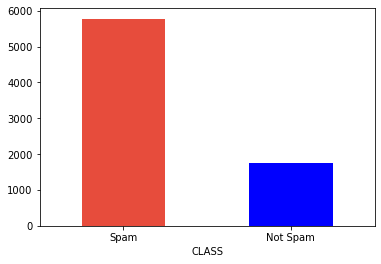

In [82]:
pd.DataFrame({"CLASS": ["Spam", "Not Spam"], "COUNT": train_data["CLASS"].value_counts()}).plot.bar(x="CLASS", y="COUNT", rot=0, legend=False, color=["#e74c3c", "blue"])

In [83]:
train_data.reset_index(drop=True, inplace=True)
train_data.tail()

,CLASS,FORMATTED_CONTENT
7523,1,This is the nd time we have tried contact u U ...
7524,0,Will b going to esplanade fr home
7525,0,Pity was in mood for that So any other suggest...
7526,0,The guy did some bitching but I acted like i d...
7527,0,Rofl Its true to its name


In [84]:
train_data = train_data[['FORMATTED_CONTENT', 'CLASS']]
train_data.to_csv('./data/Final-Dataset.csv')